<a href="https://colab.research.google.com/github/Magdabat/Projects/blob/main/Fitting_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO DO:
- Get Rid of the ZEROS IN THE DF
- make output visible
- Get the best model
- NEURAL NETWORK?
- CHECK PCA 


In [127]:
#importing packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data_end=pd.read_csv('data_end.csv', index_col=None)

In [8]:
data_end.head()

,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,Overtime_yes
0,0,577,35.0,144.0,22.0,3.0,4.0,46.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,131,58.0,682.0,10.0,4.0,4.0,37.0,3.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,488,41.0,143.0,4.0,3.0,1.0,56.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,830,32.0,859.0,4.0,3.0,3.0,98.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,532,56.0,906.0,6.0,3.0,3.0,86.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Preparing the data

## Defining X and y


In [60]:
X=data_end.drop(labels='Attrition', axis=1).values
y=data_end[['Attrition']].values

## Splitting into Test and Training sets

In [72]:
# The training set here is in fact a validation set, since the test file is saved separately
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify=y) #since the set is not balanced, startify to make attrition distribute evenly

## Standardisation

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

# Fitting Models

## Importing packages & defining functions

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [21]:
#Metrics for evaluation classification models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dataframe with metric summary
#Instead of classification report
def score_sum(y_train, y_train_pred, y_test, y_test_pred):
    '''Creates a dataframe with metrics such as accuracy, precision, recall and F1
    to compare the results for the train and test sets'''
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
            'test': [accuracy_test, precision_test, recall_test, f1_test]}
    dt_name = pd.DataFrame.from_dict(df_dict, orient='index',
                              columns=['accuracy', 'precision', 'recall', 'f1'])
    display(dt_name, gs.best_params_)

Faced with attrition, it may be important to minimize the number of false negatives, as these are instances where the model predicts that an employee will not leave, but they actually do. False negatives can be costly, as they result in lost employees or customers that could have been retained with the appropriate intervention.

In [100]:
def score_sum_neg(y_train, y_train_pred, y_test, y_test_pred):
    '''Creates a dataframe with metrics such as accuracy, precision, recall and F1
    to compare the results for the train and test sets'''
    precision_train = precision_score(y_train, y_train_pred,pos_label=0)
    recall_train = recall_score(y_train, y_train_pred,pos_label=0)
    f1_train = f1_score(y_train, y_train_pred,pos_label=0)

    precision_test = precision_score(y_test, y_test_pred,pos_label=0)
    recall_test = recall_score(y_test, y_test_pred,pos_label=0)
    f1_test = f1_score(y_test, y_test_pred,pos_label=0)

    df_dict = {'train': [ precision_train, recall_train, f1_train],
            'test': [ precision_test, recall_test, f1_test]}
    dt_name = pd.DataFrame.from_dict(df_dict, orient='index',
                              columns=[ 'precision', 'recall', 'f1'])
    display(dt_name, gs.best_params_)

In [14]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

def confusion_matrix_show(y_test, y_test_pred):
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.show()

In [15]:
# ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_show(y_test, y_test_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Logistic Regression ROC Curve')
  plt.show()
  print('---Predicted probabilities of the positive class---')
  print(f'Training set: {roc_auc_score(y_train,gs.predict_proba(X_train_std)[:,1])}')
  print(f'Test set: {roc_auc_score(y_test, gs.predict_proba(X_test_std)[:,1])}')

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

### No Penalty, all features


In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "pf__degree": [1, 2, 3],
    "lr__C": [0.001, 0.01, 0.1, 10]
}

pipe = Pipeline([('pf', PolynomialFeatures()),
                 ('lr', LogisticRegression())])

gs = GridSearchCV(pipe, param_grid, cv=kf)

gs.fit(X_train_std, y_train)

gs.best_params_

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [18]:
log_reg=score_sum( y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.758528,0.688766,0.660777,0.674482
test,0.724599,0.641791,0.609929,0.625455


{'lr__C': 0.1, 'pf__degree': 1}

### PCA

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "pca__n_components" : np.arange(2,52,5), #we have over 50 features. In reality it might be hard to track 50 features.
    "pf__degree": [1, 2, 3],
    "lr__C": [0.001, 0.01, 0.1, 10]
}

pipe = Pipeline([('pca', PCA()),
                 ('pf', PolynomialFeatures()),
                 ('lr', LogisticRegression())])

# gs = RandomizedSearchCV(pipe, param_grid, cv=kf, n_iter=2)
gs = GridSearchCV(pipe, param_grid, cv=kf)

gs.fit(X_train_std, y_train)

gs.best_params_

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

#Really overfitted with RandomizedSearchCV
#GridSearch is taking a lot of time, but provides 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,accuracy,precision,recall,f1
train,0.753846,0.686090,0.644876,0.664845
test,0.716578,0.633588,0.588652,0.610294


{'lr__C': 10, 'pca__n_components': 32, 'pf__degree': 1}

In [23]:
df_pca=score_sum( y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.753846,0.686090,0.644876,0.664845
test,0.716578,0.633588,0.588652,0.610294


{'lr__C': 10, 'pca__n_components': 32, 'pf__degree': 1}

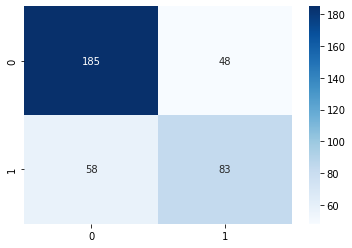

In [27]:
confusion_matrix_show(y_test, y_test_pred)

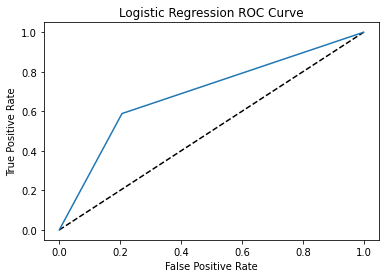

---Predicted probabilities of the positive class---
Training set: 0.8203851552069743
Test set: 0.79323045079597


In [28]:
roc_show(y_test, y_test_pred)

# KNearestNeighbours

In [151]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    #"pca__n_components" : np.arange(10,52,5),
    "knn__n_neighbors": [3,5,7,9,11]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([#('pca', PCA()),
                 ('knn', KNeighborsClassifier())
                 ])

gs = GridSearchCV(pipe, param_grid, cv=kf)
gs.fit(X_train_std, y_train)
gs.best_params_

# Prediction
y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [152]:
df_knn=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.731773,0.732394,0.459364,0.564604
test,0.655080,0.569767,0.347518,0.431718


{'knn__n_neighbors': 9}

# SCV

## linear kernel

In [77]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
param_grid = {
    "C": [0.001, 0.01, 1, 10, 100],
    }

kf = KFold(n_splits=5, shuffle=True, random_state=42) #imbalanced, so adding CV

gs = GridSearchCV(svm, param_grid, cv=kf)
gs.fit(X_train_std, 
       y_train.reshape(-1,)) #kept getting  warning so reshaped here (x, ). But results were the same as without reshaping

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

In [78]:
df_svc_lin_reshaped=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.767224,0.667178,0.768551,0.714286
test,0.754011,0.644970,0.773050,0.703226


{'C': 0.01}

In [85]:
df_svc_lin=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.767224,0.666667,0.770318,0.714754
test,0.754011,0.644970,0.773050,0.703226


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

### Polynomial / RBF Kernel

In [79]:
svm = SVC()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "C": [0.001, 0.01, 10, 100, 1000],
    "gamma": [0.001, 0.0001],
    "kernel": ["poly", "rbf"]
    }


gs = GridSearchCV(svm, param_grid, cv=kf, verbose=3)
gs.fit(X_train_std, y_train)

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.649 total time=   0.1s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.605 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.1s
[CV 1/5] END C=0.001, gamma=0.0001, kernel=poly;, score=0.649 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.001, gamma=0.0001, kernel=poly;, score=0.669 total time=   0.2s
[CV 3/5] END C=0.001, gamma=0.0001, kernel=poly;, score=0.582 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.001, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END C=0.001, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.649 total time=   0.2s
[CV 2/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.669 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 4/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.605 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.602 total time=   0.1s
[CV 1/5] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END ..C=0.01, gamma=0.001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.649 total time=   0.1s
[CV 2/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 4/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.605 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.1s
[CV 1/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.649 total time=   0.1s
[CV 2/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 4/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.605 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.602 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.736 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.769 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.793 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.779 total time=   0.1s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.739 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.769 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.709 total time=   0.1s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.699 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.699 total time=   0.1s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.756 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.763 total time=   0.2s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.719 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.746 total time=   0.1s
[CV 1/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.736 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.766 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.786 total time=   0.1s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.722 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.783 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.676 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.592 total time=   0.1s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.615 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.622 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.696 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.709 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.706 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.719 total time=   0.3s
[CV 1/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.649 total time=   0.1s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.669 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.1s
[CV 5/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.1s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.773 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.793 total time=   0.2s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.719 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.763 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
df_svc_rbf=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.767224,0.666667,0.770318,0.714754
test,0.754011,0.644970,0.773050,0.703226


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [101]:
df_svc_rbf_neg=score_sum_neg(y_train, y_train_pred, y_test, y_test_pred)

,precision,recall,f1
train,0.845422,0.765339,0.803390
test,0.843902,0.742489,0.789954


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


# Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

param_grid = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [2, 4, 6, 8]}

gs = GridSearchCV(dt, param_grid, cv=kf)

gs.fit(X_train_std, y_train)

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std) 

In [130]:
score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.773244,0.684553,0.743816,0.712955
test,0.754011,0.652174,0.744681,0.695364


{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Random Forest

In [135]:
rf = RandomForestClassifier(random_state=42,bootstrap=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

param_grid = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

gs = GridSearchCV(rf, param_grid, cv=kf)

gs.fit(X_train_std, y_train)

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std) 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [134]:
rf=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.631438,0.826087,0.033569,0.064516
test,0.633690,0.750000,0.042553,0.080537


{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'n_estimators': 300}

In [136]:
rf_bootstap=score_sum(y_train, y_train_pred, y_test, y_test_pred)

,accuracy,precision,recall,f1
train,0.631438,0.826087,0.033569,0.064516
test,0.633690,0.750000,0.042553,0.080537


{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'n_estimators': 300}

## Neural Network

In [ ]:

## Try without Gridsearch

## GridSearch

# RandomForest

# patrzymy na korelacje

# searcher.fit(X_train, y_train)

# searcher.cv_results_

# searcher.best_estimator_

# svm = SVC(C=0.000000000001, kernel="linear")
# svm.fit(X_train, y_train)

# y_pred_train = svm.predict(X_train)
# print_results(calculate_metrics(y_train, y_pred_train),
#               classifier_id='svc')

In [ ]:
## Defining X and y

X=data_end.drop(labels='Attrition', axis=1).values
y=data_end[['Attrition']]

## Splitting into Test and Training sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify=y)

y_train.value_counts()

y_test.value_counts()

## Correlation

corr=data_end.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Standardisation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

y_train_std=sc.fit_transform(y_train)
y_test_std=sc.transform(y_test)

# Fitting Models

## Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

len(X_train_std[0,:])

## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

#GridSearch is taking a lot of time, so I will try with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "pca__n_components" : np.arange(10,52,2),
    "pf__degree": [1, 2, 3],
    "lr__C": [0.001, 0.01, 0.1, 10]
}

pipe = Pipeline([('pca', PCA()),
                 ('pf', PolynomialFeatures()),
                 ('lr', LogisticRegression())])

gs = RandomizedSearchCV(pipe, param_grid, cv=kf, n_iter=2)
gs.fit(X_train_std, y_train)

gs.best_params_

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def score_sum(y_train, y_train_pred, y_test, y_test_pred):
  accuracy_train = accuracy_score(y_train, y_train_pred)
  precision_train = precision_score(y_train, y_train_pred)
  recall_train = recall_score(y_train, y_train_pred)
  f1_train = f1_score(y_train, y_train_pred)
                      
  accuracy_test = accuracy_score(y_test, y_test_pred)
  precision_test = precision_score(y_test, y_test_pred)
  recall_test = recall_score(y_test, y_test_pred)
  f1_test = f1_score(y_test, y_test_pred)

  df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
            'test': [accuracy_test, precision_test, recall_test, f1_test]}
  df = pd.DataFrame.from_dict(df_dict, orient='index',
                              columns=['accuracy', 'precision', 'recall', 'f1'])
  display(df, gs.best_params_)

df_pca=score_sum(y_train, y_train_pred, y_test, y_test_pred)
#Really overfitted with RandomizedSearchCV

# from sklearn.metrics import classification_report
# print(classification_report(y_train, y_train_pred))

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.show()

# ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_test_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train,gs.predict_proba(X_train_std)[:,1]))
print(roc_auc_score(y_test, gs.predict_proba(X_test_std)[:,1]))

#better results with GridSearchCv

# KNearestNeighbours

from sklearn.neighbors import KNeighborsClassifier

len(X[0,:])
#we have 52 features

param_grid = {
    "pca__n_components" : np.arange(10,52,5),
    "knn__n_neighbors": [3,5,7,9,11]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([('pca', PCA()),
                 ('knn', KNeighborsClassifier())
                 ])

gs = GridSearchCV(pipe, param_grid, cv=kf)
gs.fit(X_train_std, y_train)
gs.best_params_

# Prediction
y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

df_pca=score_sum(y_train, y_train_pred, y_test, y_test_pred)

# SCV

from sklearn.svm import SVC


param_grid = {
    "pca__n_components" : np.arange(10,52,5),
    "svc__C": [0.001, 0.01, 10, 100, 1000],
#    "svc__gamma": [0.001, 0.0001],
    "svc__kernel": ["linear"]
    }

# kernel="poly"

kf = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([('pca', PCA()),
                 ('svc', SVC())
                 ])

gs = GridSearchCV(pipe, param_grid, cv=kf)
gs.fit(X_train_std, y_train)
gs.best_params_

y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

df_pca=score_sum(y_train, y_train_pred, y_test, y_test_pred)

## Try without Gridsearch

## GridSearch

# RandomForest

# patrzymy na korelacje

# searcher.fit(X_train, y_train)

# searcher.cv_results_

# searcher.best_estimator_

# svm = SVC(C=0.000000000001, kernel="linear")
# svm.fit(X_train, y_train)

# y_pred_train = svm.predict(X_train)
# print_results(calculate_metrics(y_train, y_pred_train),
#               classifier_id='svc')

#Summary